In [1]:
from IPython.display import display, Latex, Markdown
import numpy as np
import sympy as sp
import lcapy as lcp
from lcapy import Circuit
import control as ctrl               
import math
import cmath
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({
                     'figure.figsize':[16,9],
                     'font.size': 22, 
                     'xaxis.labellocation': 'right',
                     'yaxis.labellocation': 'top'});

## Item 1 - Obter manualmente a representação do sistema da Figura 1 no espaço de estados;

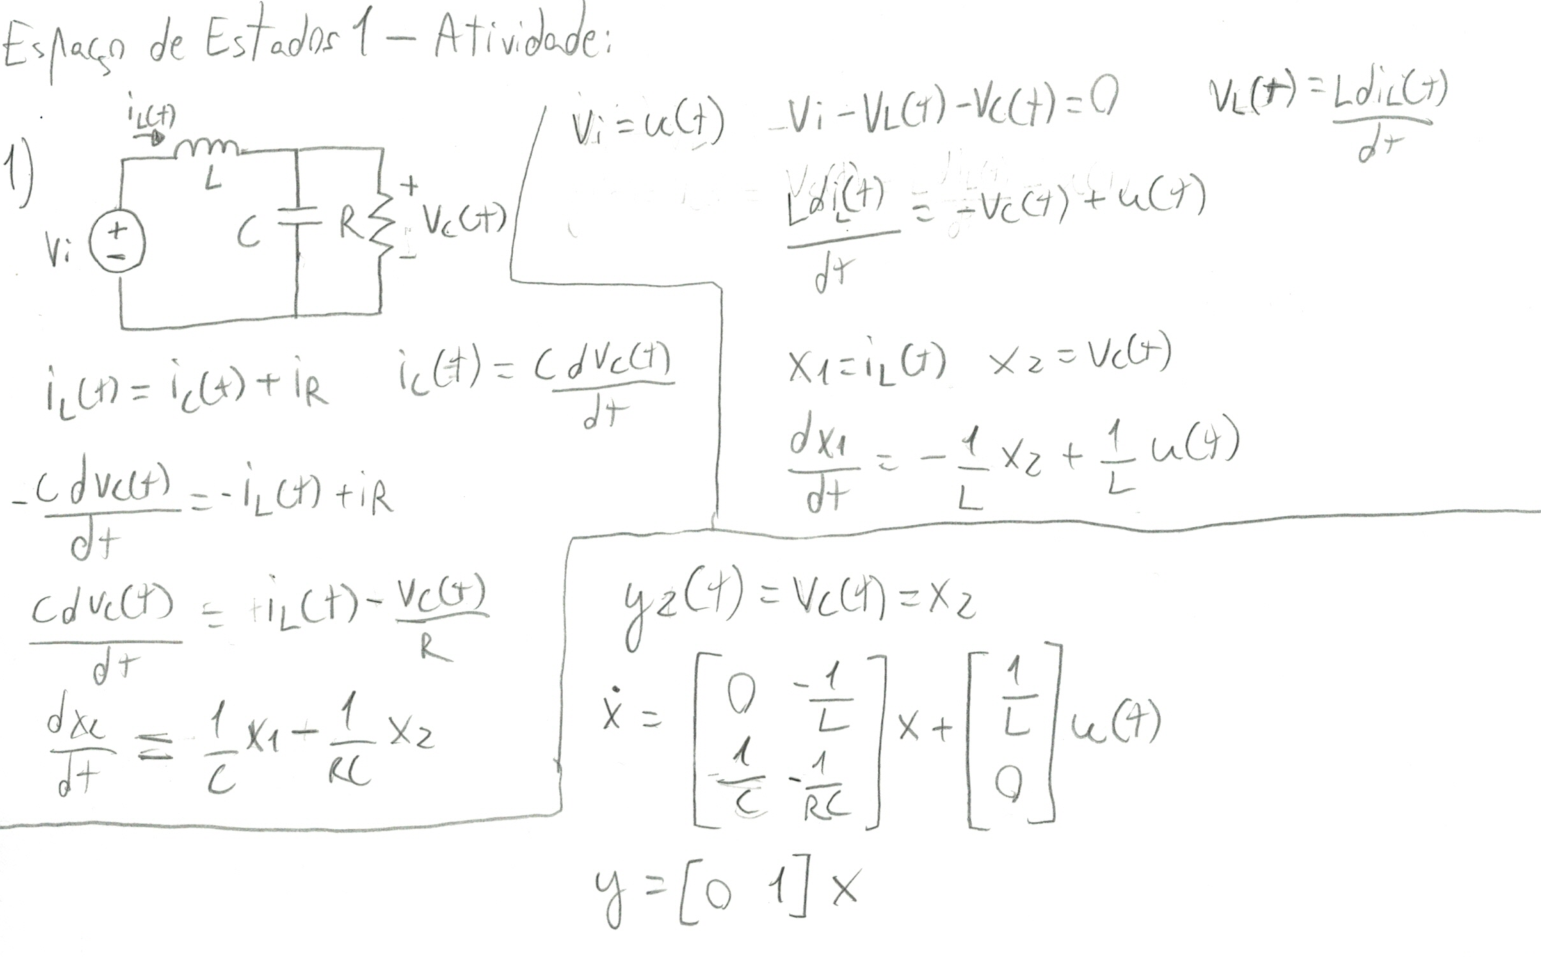

## Item 2 - Criar no Python a representação do sistema da Figura 1;

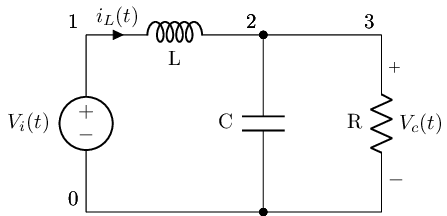

In [2]:
cct = Circuit("""
V 1 0 {v(t)}; down=1.5, l_={V_{i}(t)}
L 1 2 L; right=1.5, i>^={i_{L}(t)}, l=L
C 2 0_2 C; down, scale=0.8, l_=C
W 2 3; right
R 3 0_3 R; down, scale=0.8, l_=R , v^={{V_{c}(t)}}
W 0 0_2; right
W 0_2 0_3; right
; draw_nodes=connections""");
cct.draw();
ss = cct.ss;

In [3]:
A = ss.A;
B = ss.B;
C = ss.C.row(1);      # Lcapy considera cada nó como uma saída para a representação no espaço de estados,
D = ss.D.row(1)[0];   # portanto devem ser considerados apenas os parâmetros de saída relevantes (v2(t)).

display(Markdown('### Matriz de estados:'));
display(Latex('$ \mathbf{A} = '+str(A.latex())+'$'));
display(Markdown('### Matriz de entrada:'));
display(Latex('$ \mathbf{B} = '+str(B.latex())+'$'));
display(Markdown('### Matriz de saída:'));
display(Latex('$ \mathbf{C} = '+str(C.latex())+'$'));
display(Markdown('### Matriz de transmissão direta:'));
display(Latex('$ \mathbf{D} = '+str(D.latex())+'$'));

display(Markdown('### Representação no espaço de estados:'));
display(Latex('$ \mathbf{\dot{x}} = '+str(A.latex())+'\mathbf{x}+'+str(B.latex())+'u(t)$'));
display(Latex('$y = '+str(C.latex())+'\mathbf{x}$'));

### Matriz de estados:

<IPython.core.display.Latex object>

### Matriz de entrada:

<IPython.core.display.Latex object>

### Matriz de saída:

<IPython.core.display.Latex object>

### Matriz de transmissão direta:

<IPython.core.display.Latex object>

### Representação no espaço de estados:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Item 3 - Converter manualmente a representação do item 1 em função de transferência;

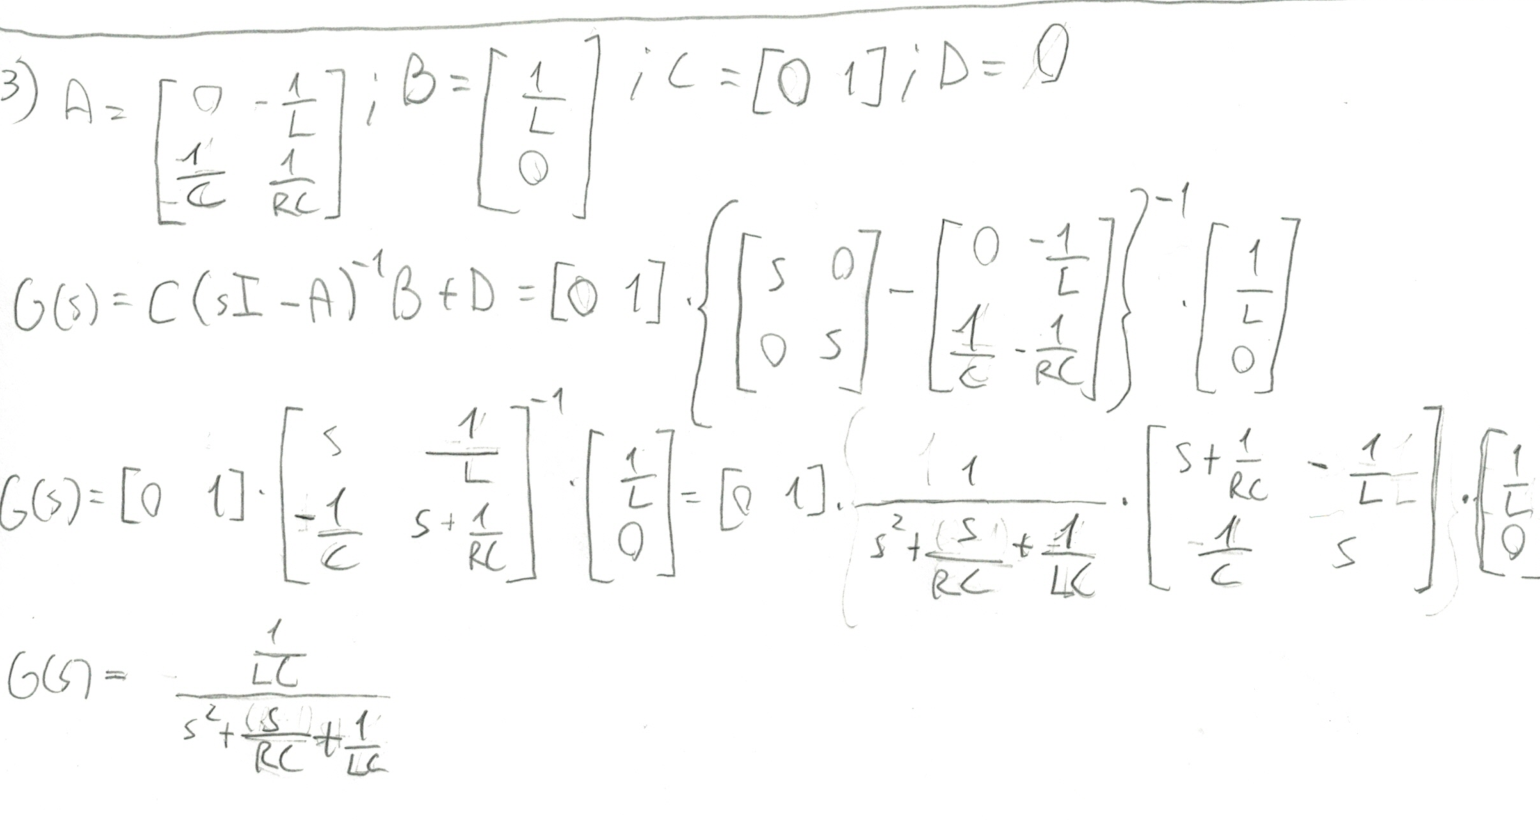

## Item 4 - Converter no Python a representação do item 1 em função de transferência;

In [4]:
G = ss.G.row(1)[0];

display(Markdown('### Função de transferência do sistema:'));
display(Latex('$G(s) = '+str(G.latex())+'$'));

### Função de transferência do sistema:

<IPython.core.display.Latex object>

## Item 5 - Converter no Python a representação do item 4 para o espaço de estados;

In [5]:
n = (G.canonical()).N.coeffs();
d = (G.canonical()).D.coeffs();

a1 = d[1];
a2 = d[2];

A = lcp.Matrix([[0, 1], [-a2, -a1]]);
B = lcp.Matrix([[0], [n[0]]]);
C = lcp.Matrix([[1, 0]]);
D = lcp.Matrix([0])[0];

display(Markdown('### Matriz de estados:'));
display(Latex('$ \mathbf{A} = '+str(A.latex())+'$'));
display(Markdown('### Matriz de entrada:'));
display(Latex('$ \mathbf{B} = '+str(B.latex())+'$'));
display(Markdown('### Matriz de saída:'));
display(Latex('$ \mathbf{C} = '+str(C.latex())+'$'));
display(Markdown('### Matriz de transmissão direta:'));
display(Latex('$ \mathbf{D} = '+str(D.latex())+'$'));

display(Markdown('### Representação no espaço de estados:'));
display(Latex('$ \mathbf{\dot{x}} = '+str(A.latex())+'\mathbf{x}+'+str(B.latex())+'u(t)$'));
display(Latex('$y = '+str(C.latex())+'\mathbf{x}$'));

### Matriz de estados:

<IPython.core.display.Latex object>

### Matriz de entrada:

<IPython.core.display.Latex object>

### Matriz de saída:

<IPython.core.display.Latex object>

### Matriz de transmissão direta:

<IPython.core.display.Latex object>

### Representação no espaço de estados:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Item 6 – Verificar a resposta ao degrau (step) de todas as representações no Python;

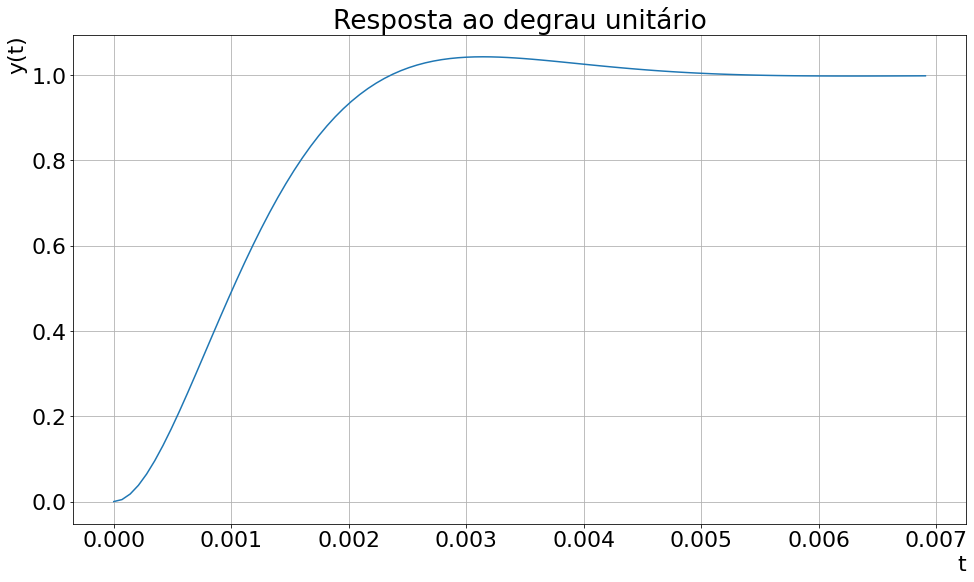

In [6]:
R = lcp.symbol('R', positive=True);
C = lcp.symbol('C', positive=True);
L = lcp.symbol('L', positive=True);
defs = {L : 5e-3, C : 100e-6, R : 5};

A = ss.A.subs(defs);
B = ss.B.subs(defs);
C = (ss.C.row(1)).subs(defs);
D = (ss.D.row(1)).subs(defs);

A = np.matrix(A.tolist());
B = np.matrix(B.tolist());
C = np.matrix(C.tolist());
D = np.matrix(D.tolist());

sys = ctrl.ss(A,B,C,D);

# Resposta ao degrau unitário da primeira representação no espaço de estados.                   
x, y = ctrl.step_response(sys);
plt.figure();
plt.plot(x, y);
plt.title("Resposta ao degrau unitário");
plt.xlabel("t");
plt.ylabel("y(t)");
plt.grid();
plt.show();

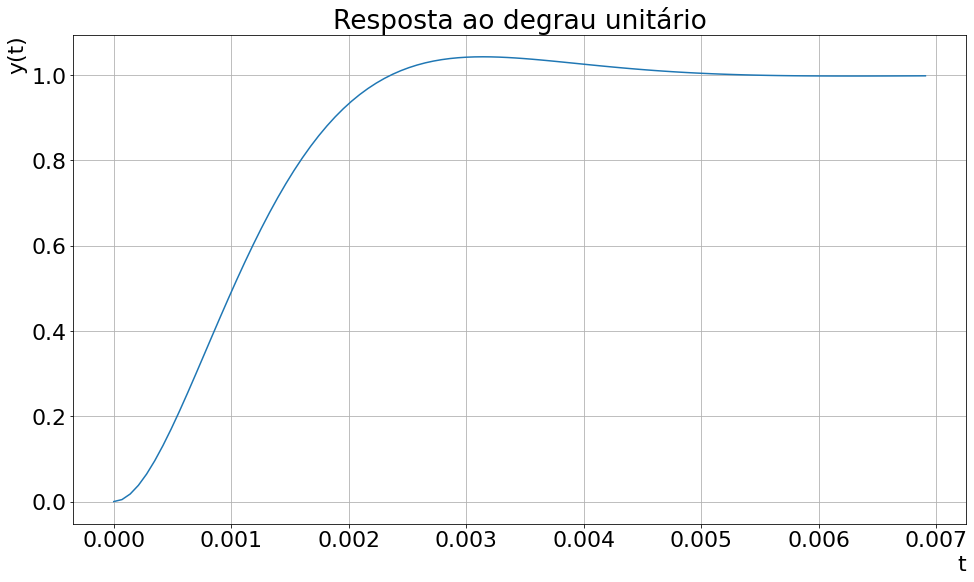

In [7]:
s, t = sp.symbols('s t')

A = sp.Matrix(A);
B = sp.Matrix(B);
C = sp.Matrix(C);
D = sp.Matrix(D);

I = np.eye(2);
Gs = (C*(s*I-A)**-1*B+D)[0].simplify();
num, den = Gs.as_numer_denom();
num = np.array(num.as_poly(s).all_coeffs()).astype(np.float64);
den = np.array(den.as_poly(s).all_coeffs()).astype(np.float64);
Gtf = ctrl.tf(num,den);

# Resposta ao degrau unitário da primeira função de transferência.                    
x, y = ctrl.step_response(Gtf);
plt.figure();
plt.plot(x, y);
plt.title("Resposta ao degrau unitário");
plt.xlabel("t");
plt.ylabel("y(t)");
plt.grid();
plt.show();

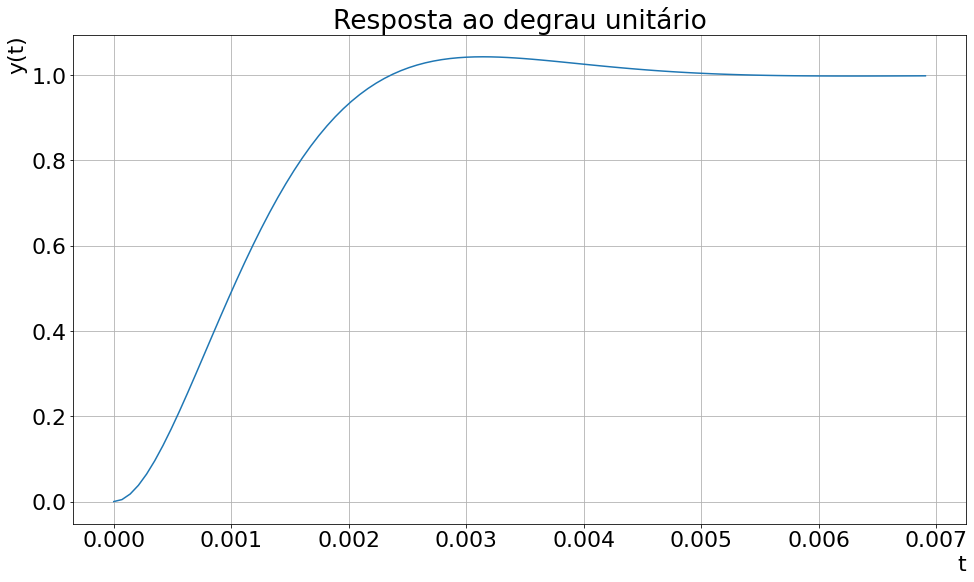

In [8]:
G = ss.G.row(1)[0].subs(defs);

n = (G.canonical()).N.coeffs();
d = (G.canonical()).D.coeffs();

n = [coef.fval for coef in n];
d = [coef.fval for coef in d];

G2 = ctrl.tf(n,d);

# Resposta ao degrau unitário da segunda função de transferência.                    
x, y = ctrl.step_response(G2);
plt.figure();
plt.plot(x, y);
plt.title("Resposta ao degrau unitário");
plt.xlabel("t");
plt.ylabel("y(t)");
plt.grid();
plt.show();

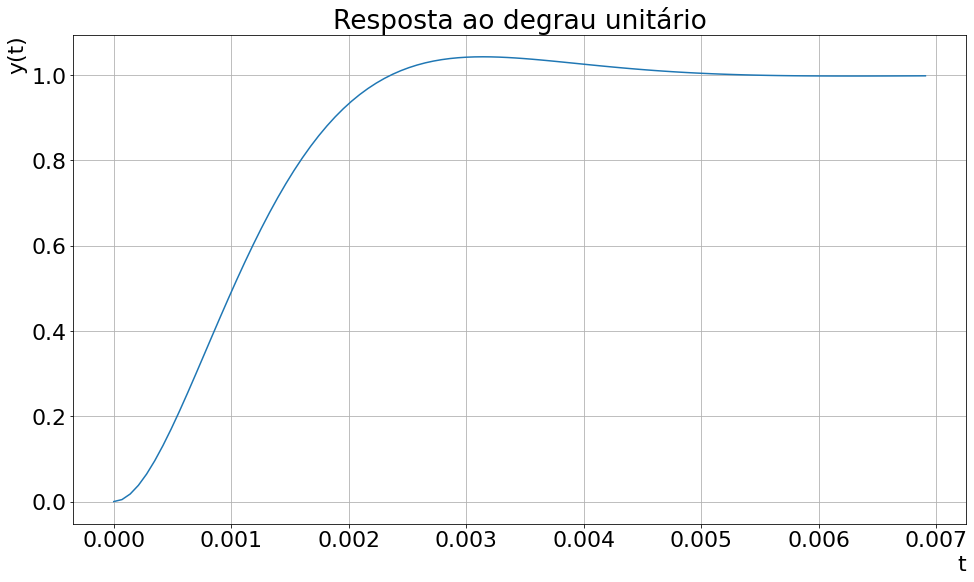

In [9]:
G = ss.G.row(1)[0].subs(defs);

n = (G.canonical()).N.coeffs();
d = (G.canonical()).D.coeffs();

a1 = d[1];
a2 = d[2];

A = lcp.Matrix([[0, 1], [-a2, -a1]]);
B = lcp.Matrix([[0], [n[0]]]);
C = lcp.Matrix([[1, 0]]);
D = lcp.Matrix([0]);

A = np.matrix(A.tolist());
B = np.matrix(B.tolist());
C = np.matrix(C.tolist());
D = np.matrix(D.tolist());

sys2 = ctrl.ss(A,B,C,D);

# Resposta ao degrau unitário da segunda representação no espaço de estados.                   
x, y = ctrl.step_response(sys2);
plt.figure();
plt.plot(x, y);
plt.title("Resposta ao degrau unitário");
plt.xlabel("t");
plt.ylabel("y(t)");
plt.grid();
plt.show();

## Item 7 - Comparar os resultados com a simulação do comportamento do circuito (opcional).

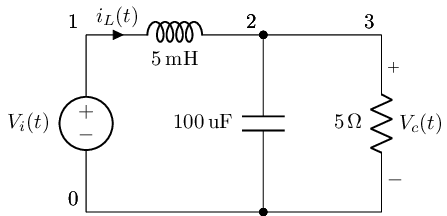

In [10]:
cct2 = Circuit("""
V 1 0 step 1; down=1.5, l_={V_{i}(t)}
L 1 2 5e-3; right=1.5, l={5 \, \mathrm{mH}}, i>^={i_{L}(t)}
C 2 0_2 100e-6; down, scale=0.8, l_={100 \, \mathrm{uF}}
W 2 3; right
R 3 0_3 5; down, scale=0.8, l_={5 \, \mathrm{\Omega}} , v^={{V_{c}(t)}}
W 0 0_2; right
W 0_2 0_3; right
; draw_nodes=connections""");
cct2.draw();

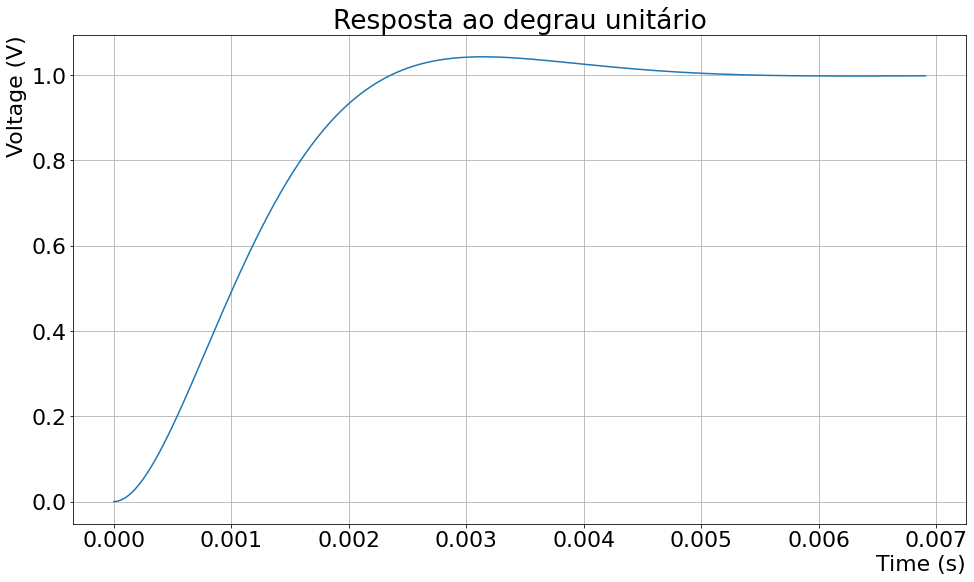

In [11]:
# Gráfico da tensão sobre o resistor.
cct2.R.v.plot((0, x[-1]));
plt.title("Resposta ao degrau unitário");